In [151]:
import pandas as pd

dataset = pd.read_csv('resources/total_mobile.csv')

In [129]:
# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# sklearn
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [152]:
# нужно разбить цены на данные классы - тут мы разбиваем (гы)
classes =  [(0, 0.0972),
            (0.0972, 1.01)]


price = dataset[['Среднемесячный расход']]
categories = []
doneFlag = False
for _, x in price.iterrows():
    for i, c in enumerate(classes):

        if c[0] <= x['Среднемесячный расход'] < c[1]:
            categories.append(i)
            breakFlag = True
            break

    if doneFlag:
        continue
dataset['Категория цены'] = categories
# берём только те колонки которые извлекли в 4 лабе
dataset = dataset[['Средняя продолжительность разговоров', 'Звонков днем за месяц',
       'Звонков вечером за месяц', 'Звонков ночью за месяц',
       'Звонки в другие страны', 'Категория цены']]

In [153]:
X = dataset[dataset.columns.drop(labels='Категория цены')]
y = dataset['Категория цены']

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [155]:
ppn =  MLPClassifier(max_iter=100, solver='adam', activation='relu', verbose=True)
ppn.fit(X_train, y_train)
y1 = ppn.predict(X_test)
print('Неверно классифицированные образцы: %d' % (y_test != y1).sum())
print('Точность: %.2f' % accuracy_score(y_test, y1))

Iteration 1, loss = 0.65555570
Iteration 2, loss = 0.62420546
Iteration 3, loss = 0.59861959
Iteration 4, loss = 0.57294395
Iteration 5, loss = 0.54764776
Iteration 6, loss = 0.52091908
Iteration 7, loss = 0.49277184
Iteration 8, loss = 0.46697317
Iteration 9, loss = 0.44504980
Iteration 10, loss = 0.42418339
Iteration 11, loss = 0.40502855
Iteration 12, loss = 0.38656083
Iteration 13, loss = 0.36964913
Iteration 14, loss = 0.35344820
Iteration 15, loss = 0.33835524
Iteration 16, loss = 0.32630112
Iteration 17, loss = 0.31117320
Iteration 18, loss = 0.29962444
Iteration 19, loss = 0.28956789
Iteration 20, loss = 0.27808186
Iteration 21, loss = 0.26813245
Iteration 22, loss = 0.25919775
Iteration 23, loss = 0.25105414
Iteration 24, loss = 0.24271340
Iteration 25, loss = 0.23520217
Iteration 26, loss = 0.22801581
Iteration 27, loss = 0.22092695
Iteration 28, loss = 0.21430929
Iteration 29, loss = 0.20838155
Iteration 30, loss = 0.20266801
Iteration 31, loss = 0.19851076
Iteration 32, los

C:\Users\User\PycharmProjects\ml_lab1\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0.5, 1.1, 'Матрица неточности Персептрон\n')

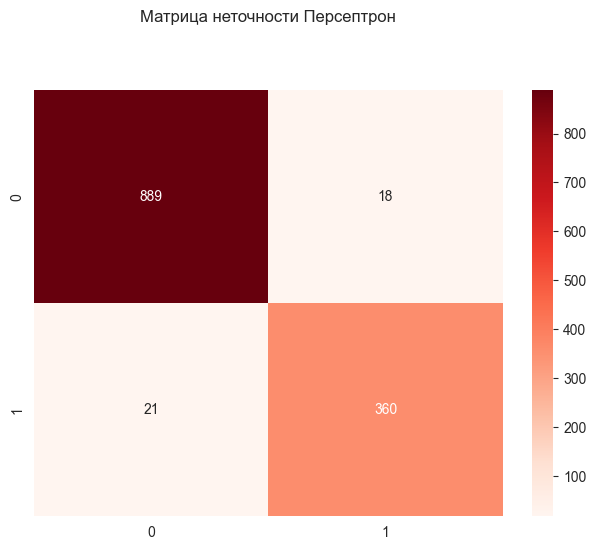

In [156]:
cnf_matrix_log = confusion_matrix(y_test, y1)
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Матрица неточности Персептрон\n', y=1.1)

In [157]:
import numpy as np
import pandas as pd

# нужно разбить цены на данные классы - тут мы разбиваем (гы)
classes =  [(0, 500),
            (500, 6000)]

dataset = pd.read_csv('resources/new_mobile.csv', sep=',')
price = dataset[['Среднемесячный расход']]
categories = []
doneFlag = False
for _, x in price.iterrows():
    for i, c in enumerate(classes):

        if c[0] <= x['Среднемесячный расход'] < c[1]:
            categories.append(i)
            breakFlag = True
            break

    if doneFlag:
        continue
dataset['Категория цены'] = categories
dataset[['Среднемесячный расход', 'Категория цены']]

,Среднемесячный расход,Категория цены
0,121.54,0
1,287.51,0
2,113.70,0
3,410.23,0
4,537.60,1
...,...,...
4286,186.20,0
4287,500.68,1
4288,470.42,0
4289,858.99,1


In [158]:
X = dataset[['Средняя продолжительность разговоров', 'Звонков днем за месяц',
       'Звонков вечером за месяц', 'Звонков ночью за месяц',
       'Звонки в другие страны']]
y = dataset['Категория цены']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2574, 5), (2574,), (1717, 5), (1717,))

In [159]:
ppn =  MLPClassifier(max_iter=100, solver='adam', activation='relu', verbose=True)
ppn.fit(X_train, y_train)
y1 = ppn.predict(X_test)
print('Неверно классифицированные образцы: %d' % (y_test != y1).sum())
print('Точность: %.2f' % accuracy_score(y_test, y1))

Iteration 1, loss = 0.95326708
Iteration 2, loss = 0.66233399
Iteration 3, loss = 0.60708566
Iteration 4, loss = 0.58462029
Iteration 5, loss = 0.54417644
Iteration 6, loss = 0.52190873
Iteration 7, loss = 0.50867610
Iteration 8, loss = 0.48698165
Iteration 9, loss = 0.47322808
Iteration 10, loss = 0.45896067
Iteration 11, loss = 0.44431490
Iteration 12, loss = 0.43432379
Iteration 13, loss = 0.42444171
Iteration 14, loss = 0.40629216
Iteration 15, loss = 0.39455931
Iteration 16, loss = 0.38528771
Iteration 17, loss = 0.38896544
Iteration 18, loss = 0.37748893
Iteration 19, loss = 0.36761594
Iteration 20, loss = 0.36388777
Iteration 21, loss = 0.35145130
Iteration 22, loss = 0.33861531
Iteration 23, loss = 0.33133426
Iteration 24, loss = 0.32527575
Iteration 25, loss = 0.31831829
Iteration 26, loss = 0.31937772
Iteration 27, loss = 0.30875707
Iteration 28, loss = 0.30237957
Iteration 29, loss = 0.29772131
Iteration 30, loss = 0.29822473
Iteration 31, loss = 0.28667554
Iteration 32, los

C:\Users\User\PycharmProjects\ml_lab1\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0.5, 1.1, 'Матрица неточности Персептрон\n')

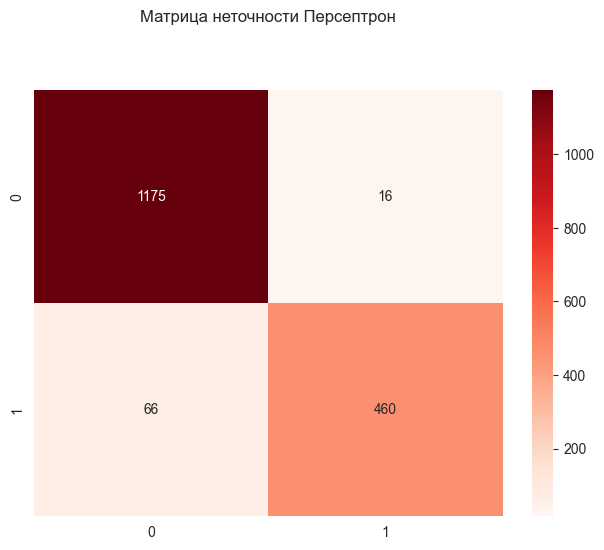

In [150]:
cnf_matrix_log = confusion_matrix(y_test, y1)
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Матрица неточности Персептрон\n', y=1.1)